In [1]:
# ===============================
# 📊 Import Library Dasar
# ===============================
import pandas as pd
import numpy as np
import os
import warnings

warnings.filterwarnings('ignore')

# ===============================
# 💬 Library NLP
# ===============================
from textblob import TextBlob, Word
import nltk
from nltk.corpus import stopwords

# Unduh resource NLTK (cukup sekali saja)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package stopwords to C:\Users\satria
[nltk_data]     rahman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\satria
[nltk_data]     rahman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\satria
[nltk_data]     rahman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\satria rahman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
data=pd.read_csv('dataset_sms_spam_v1.csv',on_bad_lines='skip')
data[0:1000]
print('Banyak SMS yang ada: {}\n'.format(data.shape[0]))
print('Banyak duplikat: {}\n'.format(data.duplicated().sum()))
print('Informasi lain:')
data.isnull().sum()
data.info()
data.sum()

Banyak SMS yang ada: 1143

Banyak duplikat: 1

Informasi lain:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Teks    1143 non-null   object
 1   label   1143 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


Teks     [PROMO] Beli paket Flash mulai 1GB di MY TELKO...
label                                                  813
dtype: object

In [3]:
# ===============================
# 🎨 Visualisasi Data (Opsional)
# ===============================
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# ===============================
# 📥 Load dan Persiapan Data
# ===============================
# pastikan variabel data sudah ada sebelumnya, contoh:
data = pd.read_csv("dataset_sms_spam_v1.csv")

# Hapus duplikat
data.drop_duplicates(inplace=True)

# Perbaiki label salah (jika 2 dianggap spam → ubah jadi 1)
data = data.replace({'label': 2}, 1)

# Ubah semua teks ke huruf kecil
data['Teks'] = data['Teks'].str.lower()
data[0:1000]

,Teks,label
0,[promo] beli paket flash mulai 1gb di my telko...,1
1,2.5 gb/30 hari hanya rp 35 ribu spesial buat a...,1
2,"2016-07-08 11:47:11.plg yth, sisa kuota flash ...",1
3,"2016-08-07 11:29:47.plg yth, sisa kuota flash ...",1
4,4.5gb/30 hari hanya rp 55 ribu spesial buat an...,1
...,...,...
996,permintaan anda sedang diproses. beberapa saat...,0
997,persiapkan dengan dokumen draftnya diambil di ...,0
998,perusahaannya apa aja kalau boleh tau?,0
999,pesan dari nama1 : assalamu'alaikum wr.wb. pak...,0


In [4]:

# ===============================
# 🧹 Hapus Stopword Bahasa Indonesia
# ===============================
stop = stopwords.words('indonesian')
stop += ["yg", "dr", "sm", "utk", "sd", "hub", "lg", "dgn", "tp", "udh", "nah",
         "aja", "dg", "gak", "sy", "hub", "nama1", "di", "ada", "dari", "dan",
         "ini", "ke", "anda", "aku", "saya", "yang", "mau", "ya", "untuk", 
         "dengan", "atau", "kalau", "ga", "bisa", "nya", "sdh", "uinfo", "jg", "juga", "udah"]

data["Teks"] = data['Teks'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
data


,Teks,label
0,[promo] beli paket flash 1gb my telkomsel app ...,1
1,2.5 gb/30 rp 35 ribu spesial terpilih. aktifka...,1
2,"2016-07-08 11:47:11.plg yth, sisa kuota flash ...",1
3,"2016-08-07 11:29:47.plg yth, sisa kuota flash ...",1
4,4.5gb/30 rp 55 ribu spesial terpilih. aktifkan...,1
...,...,...
1138,"yooo sama2, oke umumin grup kelas",0
1139,😁 ad nulis kerudung. kirain warna jins,0
1140,mba kirim 300,0
1141,beaok bwrangkat pagi...mau cas atay tranfer?,0


In [5]:
# ===============================
# 🧼 Hapus karakter non-alfanumerik
# ===============================
data["Teks"] = data['Teks'].str.replace('[^\w\s]', '', regex=True)

data

,Teks,label
0,promo beli paket flash 1gb my telkomsel app dp...,1
1,25 gb30 rp 35 ribu spesial terpilih aktifkan 5...,1
2,20160708 114711plg yth sisa kuota flash 478kb ...,1
3,20160807 112947plg yth sisa kuota flash 7160kb...,1
4,45gb30 rp 55 ribu spesial terpilih aktifkan 55...,1
...,...,...
1138,yooo sama2 oke umumin grup kelas,0
1139,ad nulis kerudung kirain warna jins,0
1140,mba kirim 300,0
1141,beaok bwrangkat pagimau cas atay tranfer,0


([<matplotlib.patches.Wedge at 0x1aaeb7e3770>,
 [Text(-0.009078090056805594, 1.0999625394898322, 'spam'),
  Text(0.009077792841329767, -1.0999625419427381, 'ham')],
 [Text(-0.004951685485530323, 0.5999795669944539, '50.26'),
  Text(0.004951523367998055, -0.5999795683324026, '49.74')])

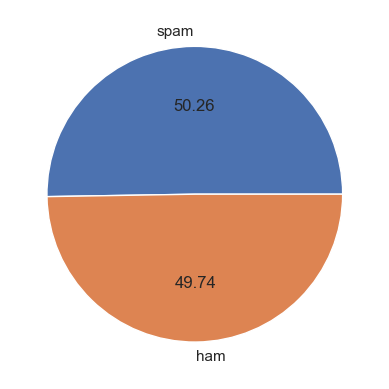

In [6]:
#Melihat isi dataset
count_value = data["label"].value_counts()
count_value

#Visualisasi Count Dataset
plt.pie(count_value, labels = ["spam", "ham"], autopct = "%0.2f")

## Visualisasi Word Cloud

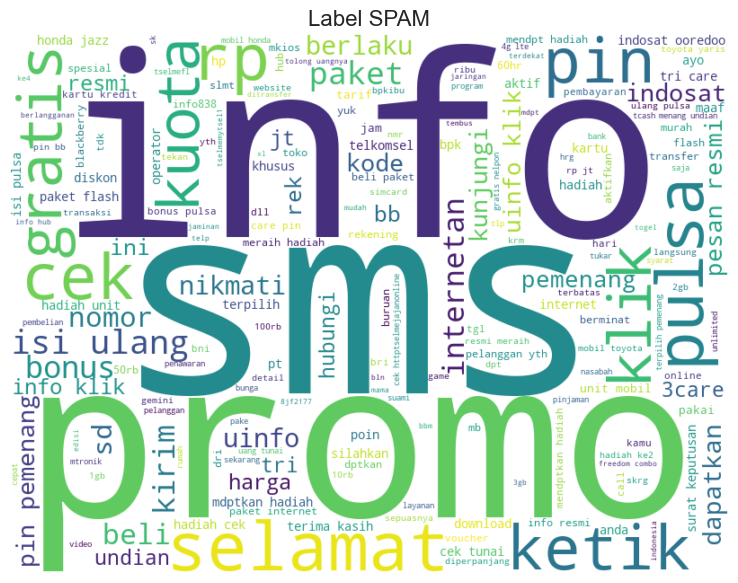

In [7]:
# Filter hanya label 1 (spam)
spam_data = data[data['label'] == 1]

# Gabungkan semua teks dari spam
spam_text = " ".join(i for i in spam_data['Teks'])

# Buat dan tampilkan WordCloud
wordcloud_spam = WordCloud(
    background_color="white",
    width=800,
    height=600
).generate(spam_text)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.title("Label SPAM", fontsize=16)
plt.show()


In [8]:
# ===============================
# 🧠 Lemmatization
# ===============================
!python -m textblob.download_corpora

lemmatized_texts = []
for txt in data['Teks']:
    blb = TextBlob(txt)
    wrds = [Word(w).lemmatize() for w in blb.words]
    lemmatized_texts.append(' '.join(wrds))

data['Teks'] = lemmatized_texts

# ===============================
# 🔀 Shuffle Dataset
# ===============================
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data


Finished.


[nltk_data] Downloading package brown to C:\Users\satria
[nltk_data]     rahman\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\satria
[nltk_data]     rahman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\satria
[nltk_data]     rahman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\satria rahman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to C:\Users\satria
[nltk_data]     rahman\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\satria
[nltk_data]     rahman\AppData\Roaming\nltk_da

,Teks,label
0,pakai xl tdk repot setting langsung internetan...,1
1,terimakasih paket 60 mb aktif cek bonus 889 ka...,0
2,gratis internetan 5mb berlaku 7 isi ulang axis...,1
3,togel sgp edisi senin 10062013 angka jitu 4076...,1
4,mega prima tama promo discon 2050 blackberry d...,1
...,...,...
1137,semangat gita putri adison esok hari semoga te...,0
1138,pak,0
1139,yaudah mah eta harddisk laptop maneh keluarin ...,0
1140,kalo ngga besok kampus senin kampus,0


In [12]:
# ===============================
# ✂️ Split Data
# ===============================
from sklearn.model_selection import train_test_split

X = data['Teks'].values
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# ===============================
# 🔢 Vectorization (CountVectorizer + Bigram)
# ===============================
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=3)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# ===============================
# ⚙️ Model Training (SVM)
# ===============================
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)

# ===============================
# 📈 Evaluasi Model
# ===============================
accuracy = svm_model.score(X_test_vec, y_test)
print(f"Accuracy score: {accuracy:.4f}")

# ===============================
# 💬 Prediksi SMS Baru
# ===============================
sms_message = input("Masukkan SMS Anda: ")

test_vec = tfidf.transform([sms_message])
prediction = svm_model.predict(test_vec)[0]

if prediction == 0:
    print("✅ Bukan pesan spam.")
else:
    print("⚠️ AWAS PESAN SPAM!!")

Accuracy score: 0.9441


Masukkan SMS Anda:  hai satria apa kabar ?


✅ Bukan pesan spam.


In [13]:
svm_model.classes_

array([0, 1])

In [14]:
import joblib

joblib.dump(svm_model, "model_klasifikasi_spam.joblib")

['model_klasifikasi_spam.joblib']

In [16]:
joblib.dump(tfidf, "vectorizer.joblib")

['vectorizer.joblib']